# Example to capture spectrum from OSA Yokogawa AQ6370C  using ethernet connection

*  Check the full featured library at https://github.com/lpd-lab/LPD-PyLib

Tested using:
* pyvisa version '1.10.1'
* python 3.7.7 64.  ibt

In [38]:
import visa
import numpy as np
import matplotlib.pyplot as plt

First. you must manually create a  TCP/IP instrument usinng NIMAX (in MAC/LINUX use NI-VISA Configuration app.). Only after creating the instrument you will be able to see it below.

In [57]:
sys.argv

['/Users/gsw/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py',
 '-f',
 '/Users/gsw/Library/Jupyter/runtime/kernel-f8955fa7-4e66-4afe-9786-b3c0cd6667b8.json']

In [9]:
rm = visa.ResourceManager()
rm.list_resources("?*")

('ASRL1::INSTR',
 'ASRL2::INSTR',
 'TCPIP0::nano-osa-aq6370c.ifi.unicamp.br::10001::SOCKET')

## Make sure you setup the OSA properly goind through the following menu items
* System 
    * More 1/4
        * Remote interface (set Ethernet here)
        * Network settings
            * Remote User account (set user to: anonymous, password to: 123456)
        
## Make sure you can ping your OSA ip! You can also check for the IP in the following OSA menu:
* System 
    * More 4/4
        * System Information
            *  System Info

# Defining strings for communication

In [47]:
osa_user = "anonymous"
osa_passwd = "123456"
osa_name = "nano-osa-aq6370c.ifi.unicamp.br"
osa_port = "10001"
#----------------
#building strings
osa_string = "TCPIP0::" + osa_name + "::" + osa_port + "::SOCKET"
open_string = 'open "' + osa_user + '"'
print(osa_string)
print(open_string)

TCPIP0::nano-osa-aq6370c.ifi.unicamp.br::10001::SOCKET
open "anonymous"


# testing communication

In [34]:
osa = rm.open_resource(osa_string,read_termination="\r\n", timeout = 5000)
#---
out = osa.query(open_string) #autenticacao, username
print(out) # AUTHENTICATE CRAM-MD5.
out = osa.query(osa_passwd) # autenticacao, sennha
print(out) # ready
out = osa.query("*IDN?") # 'YOKOGAWA,AQ6370C,91N709667,02.03'
print(out) #
#---
osa.close()

AUTHENTICATE CRAM-MD5.
ready
YOKOGAWA,AQ6370C,91N709667,02.03


# Capturing spectrum

Make sure you have an actual spectrum on your OSA screenn

In [51]:
osa = rm.open_resource(osa_string,read_termination="\r\n", timeout = 5000)
#---
out = osa.query(open_string) #autenticacao, username
print(out) # AUTHENTICATE CRAM-MD5.
out = osa.query(osa_passwd) # autenticacao, sennha
print(out) # ready
out = osa.query("*IDN?") # 'YOKOGAWA,AQ6370C,91N709667,02.03'
print(out) #
#---
osa.write("format:data real,32") # binary data format
wavelength =  np.array(osa.query_binary_values("trac:data:x? tra", datatype='f', is_big_endian=False))
power = np.array(osa.query_binary_values("trac:data:y? tra", datatype='f', is_big_endian=False))
#---
osa.close()

AUTHENTICATE CRAM-MD5.
ready
YOKOGAWA,AQ6370C,91N709667,02.03


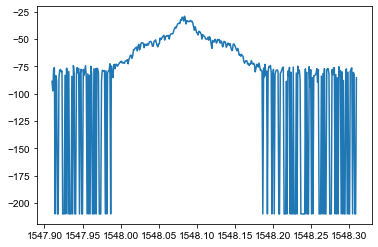

In [44]:
plt.plot(wavelength*1e9,espectro)